# KMeans

In [ ]:
options("scipen"=100, "digits"=4)
if(!require("readr")) install.packages("readr")
if(!require("Metrics")) install.packages("Metrics")
library("Metrics")
library("readr")

This simple example is taken from [KMeans
Clustering](https://www.guru99.com/r-k-means-clustering.html)

Suppose we have the age of some customers and the amount they spent on
an online retail website for a month. Can we get an idea of what kinds
of groups we have here? We would like to cluster the data in some way.

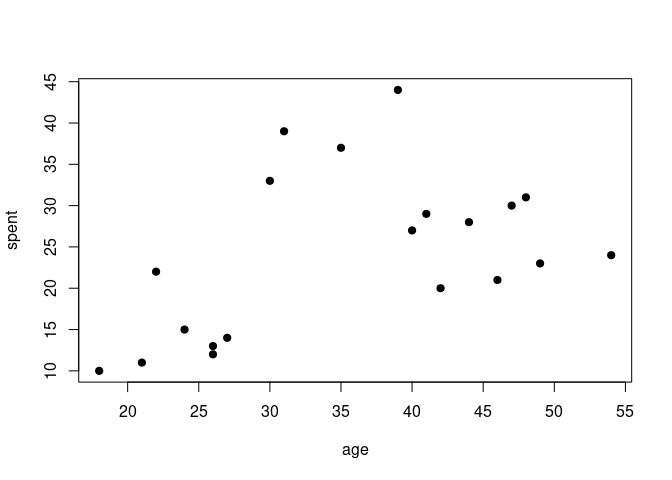

In [ ]:
age = c(18, 21, 22, 24, 26, 26, 27, 30, 31, 35, 39, 40, 41, 42, 44, 46, 47, 48, 49, 54)
spent= c(10, 11, 22, 15, 12, 13, 14, 33, 39, 37, 44, 27, 29, 20, 28, 21, 30, 31, 23, 24)
plot(age, spent, pch=19)

It looks like maybe there are 2 or 3 clusters.

Lets create a dataframe with this data:

In [ ]:
df <- data.frame(age = age, spent=spent)
str(df)

'data.frame':   20 obs. of  2 variables:
 $ age  : num  18 21 22 24 26 26 27 30 31 35 ...
 $ spent: num  10 11 22 15 12 13 14 33 39 37 ...

Lets print out a little of the dataframe:

In [ ]:
head(df)

  age spent
1  18    10
2  21    11
3  22    22
4  24    15
5  26    12
6  26    13

Now lets go ahead and use `kmeans` with K=2 and see what it finds.

In [ ]:
set.seed(2)
model<-kmeans(df,2, nstart=20)

Lets show each point according to the cluster it has been added to and
also add the centers in blue.

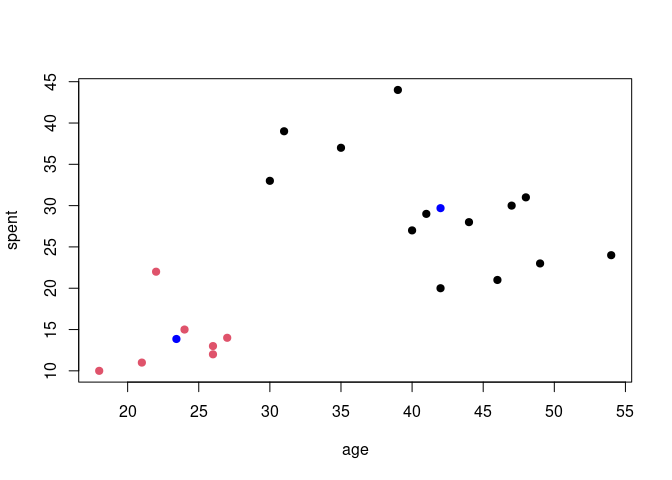

In [ ]:
plot(age, spent, col=model$cluster, pch=19)
points(model$centers, pch=19, col="blue")

Now we add a column to the dataframe `df` to show which cluster each of
the points in the data set belong to:

In [ ]:
df$cluster <- model$cluster
print(df)

   age spent cluster
1   18    10       2
2   21    11       2
3   22    22       2
4   24    15       2
5   26    12       2
6   26    13       2
7   27    14       2
8   30    33       1
9   31    39       1
10  35    37       1
11  39    44       1
12  40    27       1
13  41    29       1
14  42    20       1
15  44    28       1
16  46    21       1
17  47    30       1
18  48    31       1
19  49    23       1
20  54    24       1

The cluster column is either 1 or 2 depending on which cluster the
algorithm assigned the data point.

What about if we wanted to try 3 clusters. Lets run `kmeans` again with
K=3:

In [ ]:
set.seed(3)
model<-kmeans(df,3, nstart=20)

Lets show each point according to the cluster it has been added to and
also add the centers in blue.

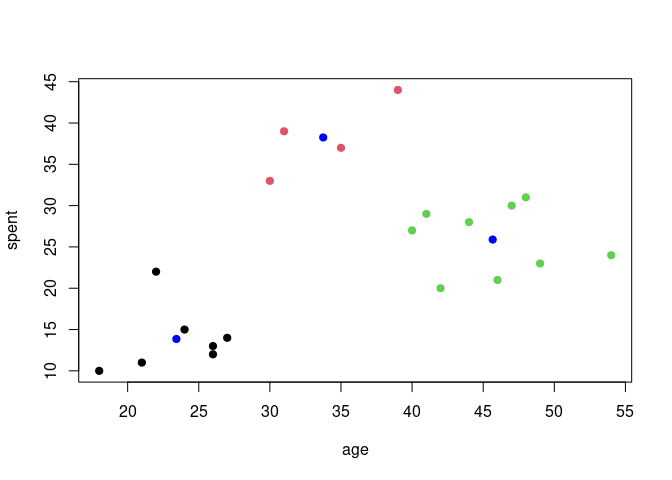

In [ ]:
plot(age, spent, col=model$cluster, pch=19)
points(model$centers, pch=19, col="blue")

Now we set the column `cluster` to show the current cluster:

In [ ]:
df$cluster <- model$cluster
print(df)

   age spent cluster
1   18    10       1
2   21    11       1
3   22    22       1
4   24    15       1
5   26    12       1
6   26    13       1
7   27    14       1
8   30    33       2
9   31    39       2
10  35    37       2
11  39    44       2
12  40    27       3
13  41    29       3
14  42    20       3
15  44    28       3
16  46    21       3
17  47    30       3
18  48    31       3
19  49    23       3
20  54    24       3

With 3 groups of customers we found these three groups:

1.  Those that are younger and spend less
2.  Those that are middle age and spend more
3.  Those that are older age and spend midrange between more and less